In [1]:
import numpy as np
from sympy import * 
import sympy as sym
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib as mpl
import copy




#Statistik wie die Großen


#Arithmetischer Mittelwert

def mittelwert(Messreihe):
    return sum(Messreihe)/len(Messreihe)


#Empirische Varianz

def empVar(Messreihe):
    if len(Messreihe) < 2:
        return 'Die Messreihe muss mindestens zwei Messwerte beinhalten'
    empvar = 0
    mw = mittelwert(Messreihe)
    indexarray = np.arange(0,len(Messreihe))
    for index in indexarray:
        empvar += (Messreihe[index] - mw)**2
    return (1/(len(Messreihe)-1))*empvar


#Empirische Standardabweichung

def empStan(Messreihe):
    return empVar(Messreihe)**(1/2)


#Standardabweichung des Mittelwerts

def Stanmi(Messreihe):
    return empStan(Messreihe)/(len(Messreihe)**(1/2))


#Standardabweichung der empirischen Standardabweichung:

def StanempStan(Messreihe):
    return empStan(Messreihe)/((2*(len(Messreihe)-1))**(1/2))



#Gauß-Fehlerfortpflanzung
# Definiere die Symbole, Parameter, die Funktion, die Unsicherheiten und die Bestwerte:

#x, y = symbols('? ? ')
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

def fehlerfort(exp, params, Bestwerte, Unsicherheiten):
    delexp = 0
    for i in np.arange(0, len(params)):
        delexp += (sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte)*Unsicherheiten[i])**2
    return delexp**(1/2)

# Korrelierte Fehlerfortpflanzung

def korfehlerfort(exp, params, Bestwerte, Unsicherheiten, Eingang):
    #x, y = symbols('? ? ')
    #Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
    #params = [?,?]
    #Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
    #Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
    #exp = ? 
    A = []
    for i in np.arange(len(params)):
        A.append(sym.lambdify(params, sym.diff(exp,params[i]), modules=['math'])(*Bestwerte))
    return np.sqrt(abs((np.dot(A,np.dot(kovmatrix(Eingang,Unsicherheiten),A)))))
        
        

#x, y = symbols('? ? ')
# Eingang= [?,?,?]  #Liste von allen Arrays mit allen Werten der Parameter um Korrelationskoeffizienten zu bestimmen
#params = [?,?]
#Bestwerte = [?,?]      #Bestwerte in gleicher Reihenfolge wie Symbole eingeben
#Unsicherheiten = [?,?]  #Unsicherheiten in gleicher Reihenfolge wie Symbole eingeben
#exp = ? 

# Kovarianzmatrix V:
def kovmatrix(Eingang, Unsicherheiten):
    if len(Eingang)!= len(Unsicherheiten):
        return 'Eingangsvariablen und Fehler stimmen nicht überein'
    V = []
    for i in np.arange(len(Eingang)):
        for n in np.arange(len(Eingang)):
            if i == n:
                V.append(Unsicherheiten[i]**2)
            else:
                V.append(empKor(Eingang[i], Eingang[n]))
    return np.reshape(V, (len(Eingang), len(Eingang)))
                
        
#Empirische Korrelation

def empKor(x,y):
    if len(x)!=len(y):
        return 'Datensätze müssen gleich lang sein'
    else:
        a = []
        for i in np.arange(len(x)):
            a.append((x[i]-mittelwert(x))*(y[i]-mittelwert(y)))
        return (1/(len(x)-1))*sum(a)
    

#Korrelationskoeffzienten

def korkoef(x,y):
    return empKor(x,y)/(empStan(x)*empStan(y))


# Einfacher t-test

def ttest(x, y, delta_x):
    return abs(x-y)/delta_x
    
    
# t-test mit zwei Ergebnissen

def ttest2(x, y, delta_x , delta_y):
    return abs(x-y)/(np.sqrt(delta_x**2+delta_y**2))

def gauß(x, A, sigma, x0, C):
    return A*np.exp( -(x-x0)**2/(2*sigma**2 )) + C 

In [2]:
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from scipy.special import yn
from scipy.special import jv
from uncertainties import ufloat

In [3]:
def bessel(x, a, b):
    return yn(a, b*x)

1073
0.040020000000000056


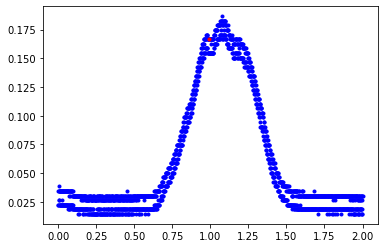

In [4]:
rtime = np.array(pd.read_csv('r_calibration_HM1508.csv'))[:,0]*10**3
rsignal = np.array(pd.read_csv('r_calibration_HM1508.csv'))[:,1]

k=993

plt.scatter(rtime, rsignal, color='blue', marker='.')
print(rsignal.argmax())
plt.scatter(rtime[k], rsignal[k], color='red', marker='.')
print(rtime[k]-rtime[k-40])

In [5]:
#Kalibration
lambda_ = 632.8*10**-9
K = (10**-2)/80
theta = ufloat(math.degrees(np.arcsin(lambda_/K)),0)
print(theta)


t_01 = ufloat(0.973487, 0.04)
t_02 = ufloat(1.07354, 0.03)
t_03 = ufloat(1.18559, 0.06)
print((t_02-t_01))
print((t_03-t_02))
print(theta/(t_02-t_01))
print(theta/(t_03-t_02))
zeit = 0.5*(theta/(t_03-t_02) + theta/(t_02-t_01))
print( 0.5*(theta/(t_03-t_02) + theta/(t_02-t_01)))
print('deg/ms')

0.29005539313415746+/-0
0.10+/-0.05
0.11+/-0.07
2.9+/-1.4
2.6+/-1.5
2.7+/-0.9
deg/ms


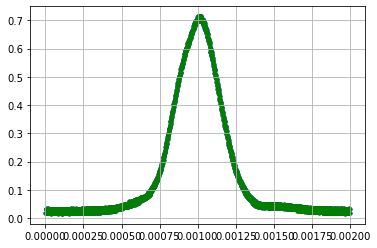

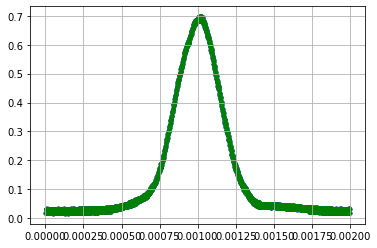

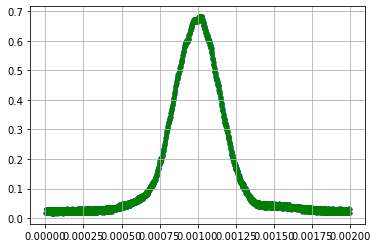

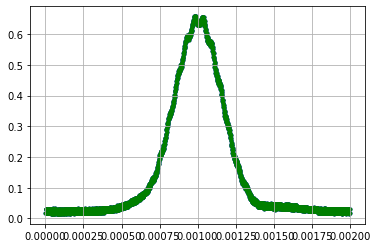

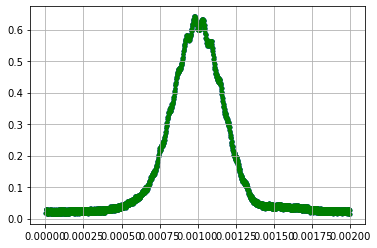

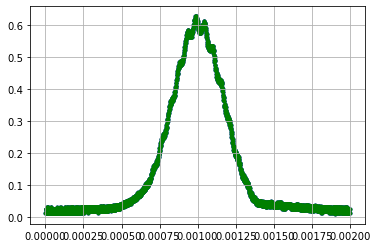

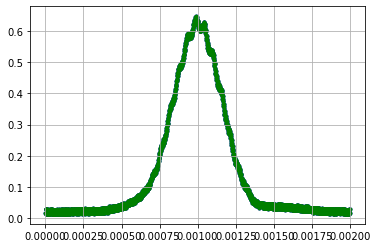

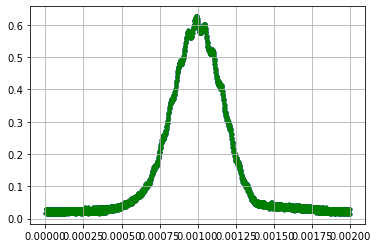

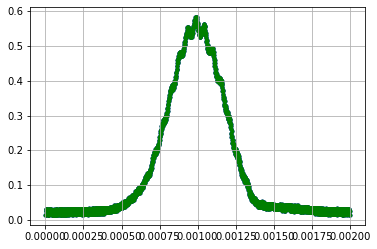

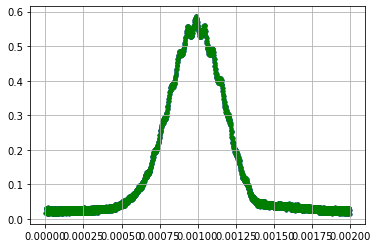

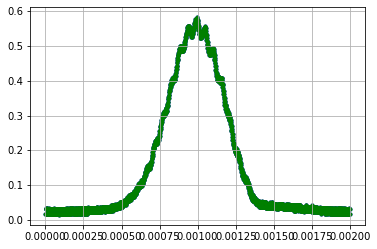

In [27]:
time = np.array([])
signal = np.array([])
Popt = []

index = np.arange(11)

for i in index:
    #print(type(i))
    time = np.append(time, np.array(pd.read_csv('konst_freq_2/'+str(i)+'_HM1508.csv'))[:,0])
    signal = np.append(signal, np.array(pd.read_csv('konst_freq_2/'+str(i)+'_HM1508.csv'))[:,1])
    time = time.reshape(i+1,2000)
    signal = signal.reshape(i+1,2000)
    
    
    
    #print(time.shape)
    #print(signal.shape)
    #signal[i] = signal[i]*1/signal[i].max()
    if i == 0:
        #print('hell')
        referenz = copy.deepcopy(signal[0])
    #print(signal1.shape)
    #print(referenz)
    popt, pcov = curve_fit(gauß, time[i], signal[i], maxfev=100000, p0=[1, 0.0004, 0.001,  0.05])
    #x = np.linspace(min(time[i]), max(time[i]), 10000)
    #plt.scatter(Time[i], Signal[i], marker='.')
    plt.scatter(time[i], signal[i], color='blue', marker='.')
    #plt.scatter(time[i], signal[i]- gauß(time[i], *popt), color='red', marker='.')
    #signal[i] = np.array(signal[i]/referenz)
    #signal[i]=signal[i]- gauß(time[i], *popt)
    #signal[i] = signal[i]- referenz
    #Signal = np.array(Signal)
    #print(signal[i].shape)
    #plt.plot(x, gauß(x, *popt), color='r')
    plt.scatter(time[i], signal[i], color='green', marker='.')
    plt.grid()
    plt.show()
    

#np.roll(data, 2)

0


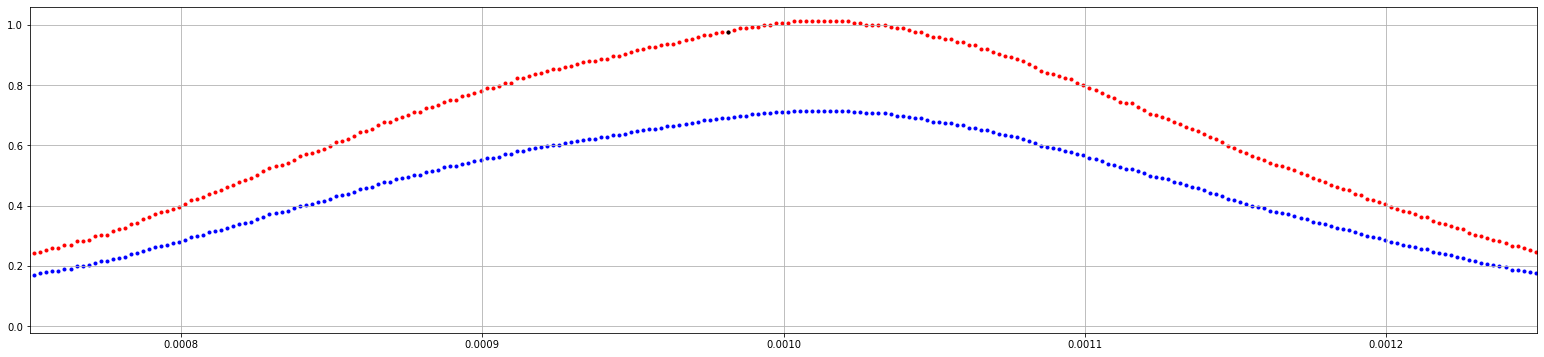

1


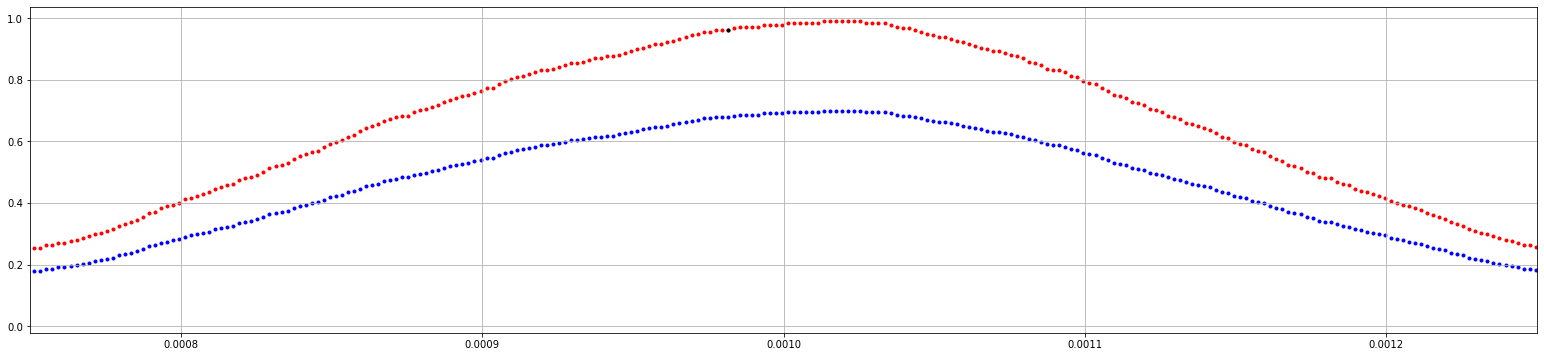

2


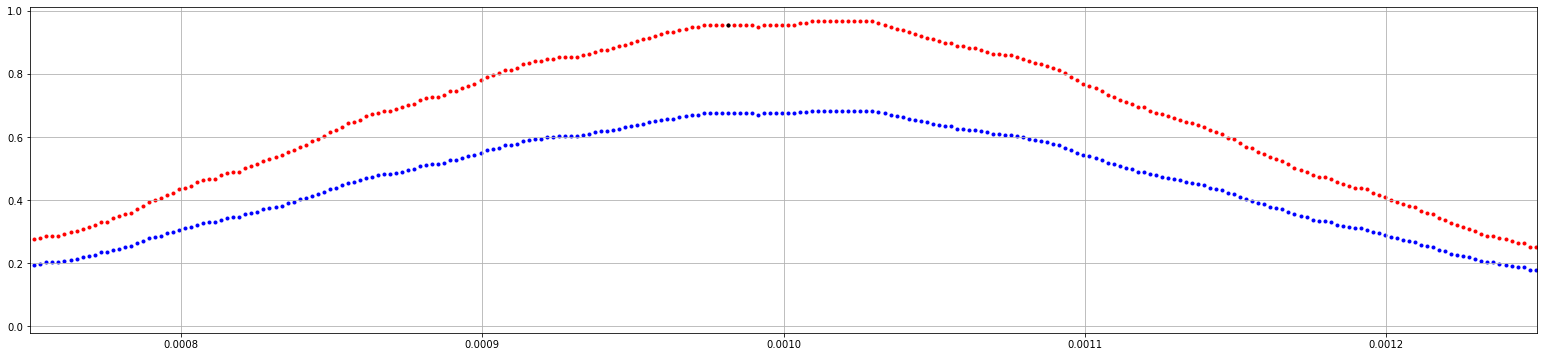

3


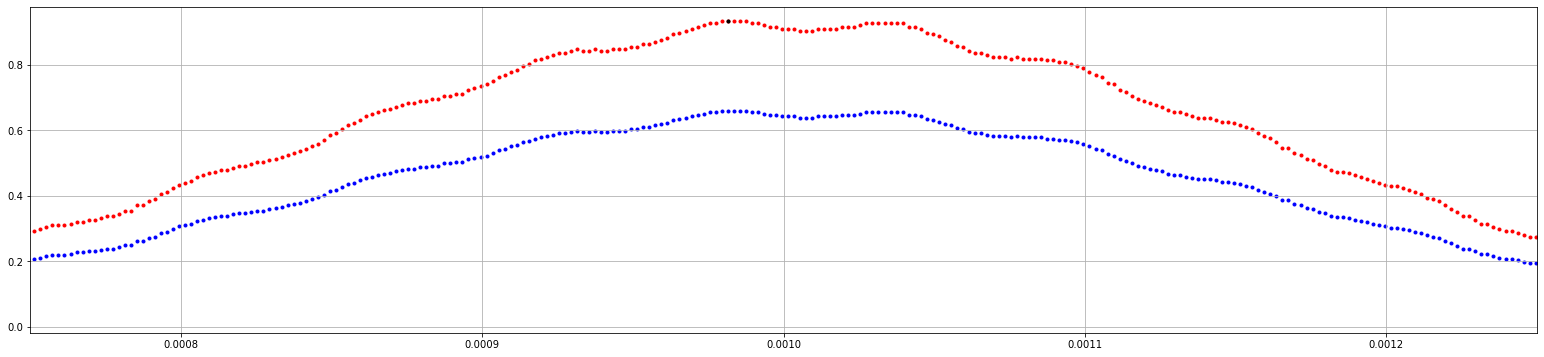

4


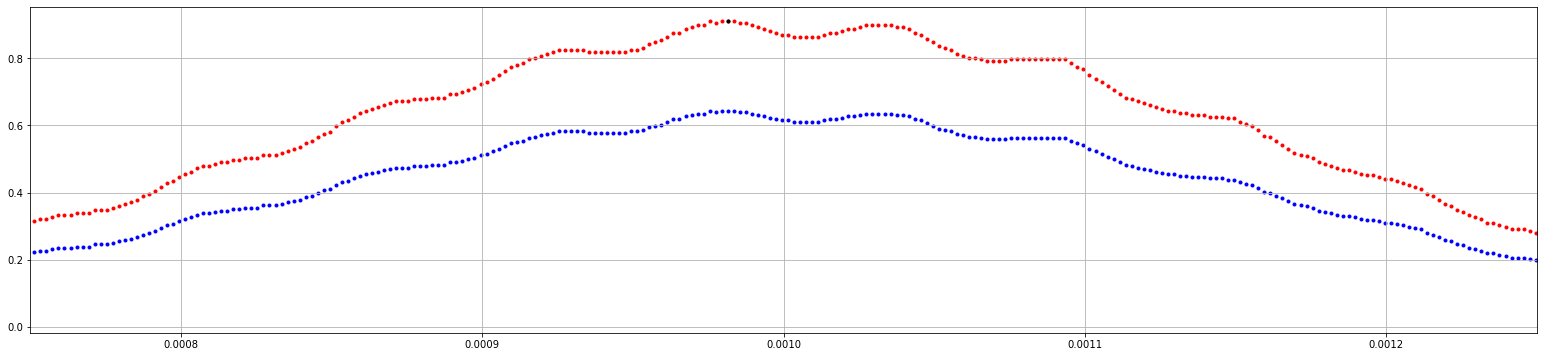

5


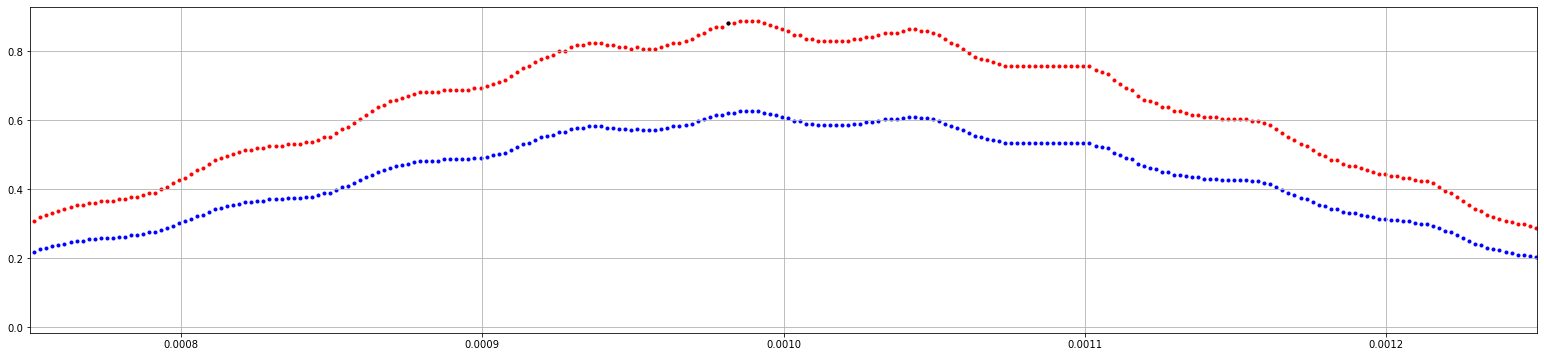

6


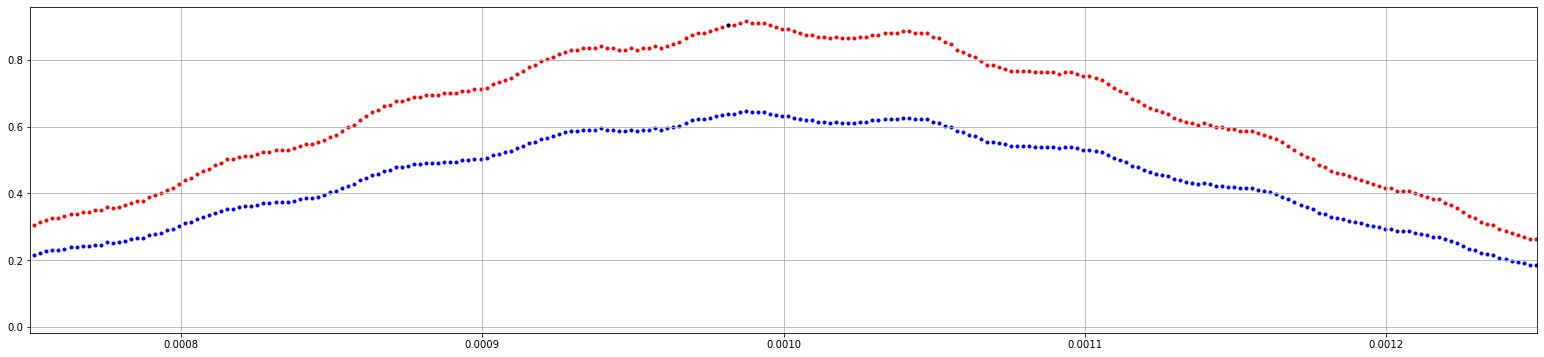

7


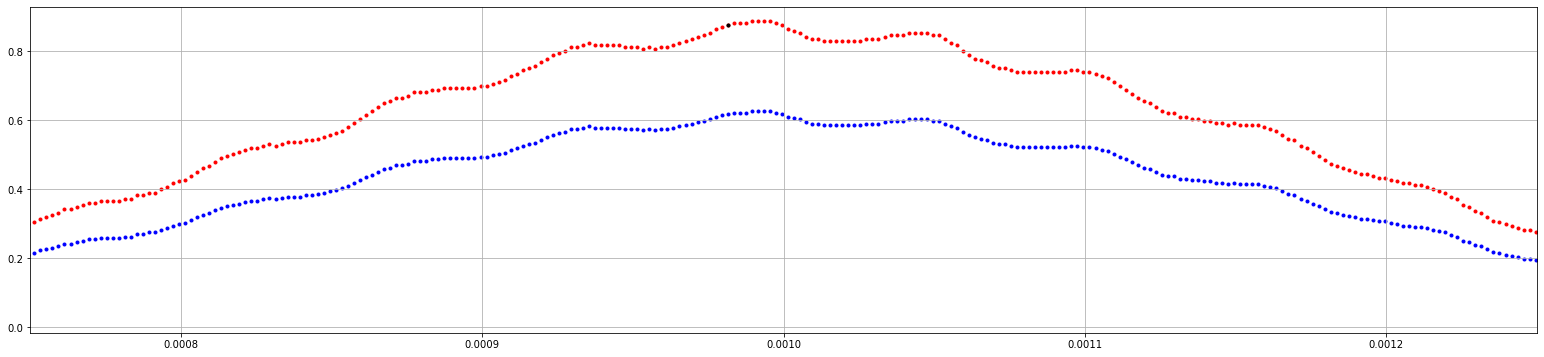

8


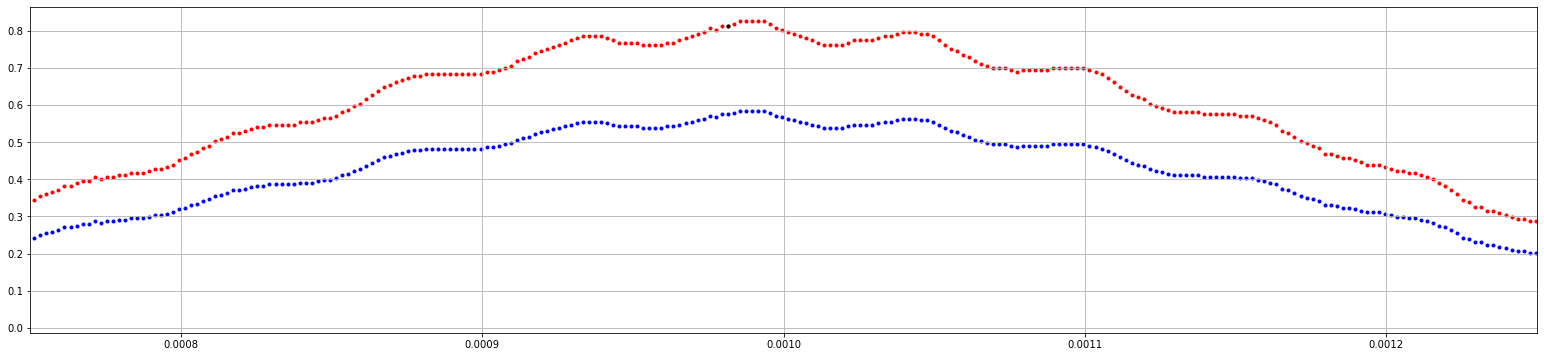

9


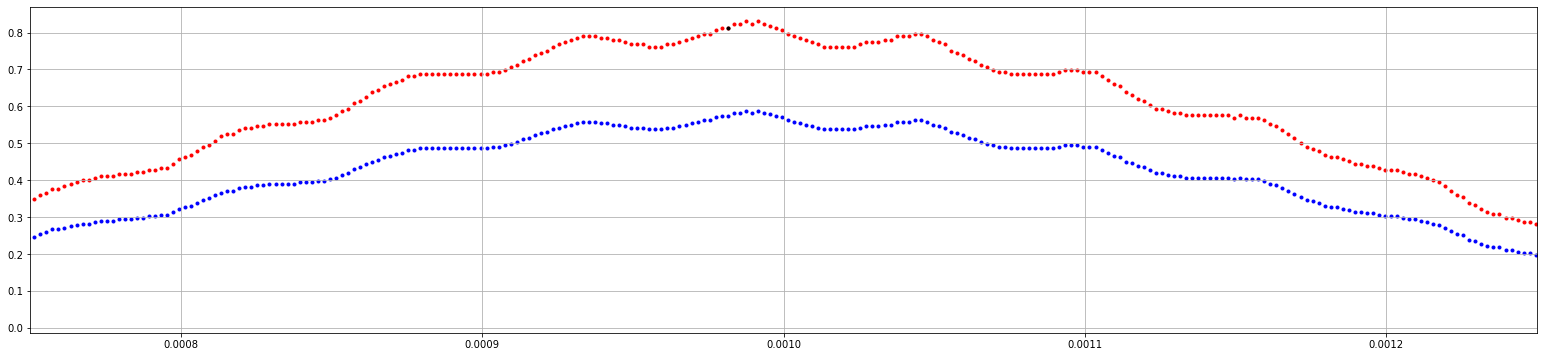

10


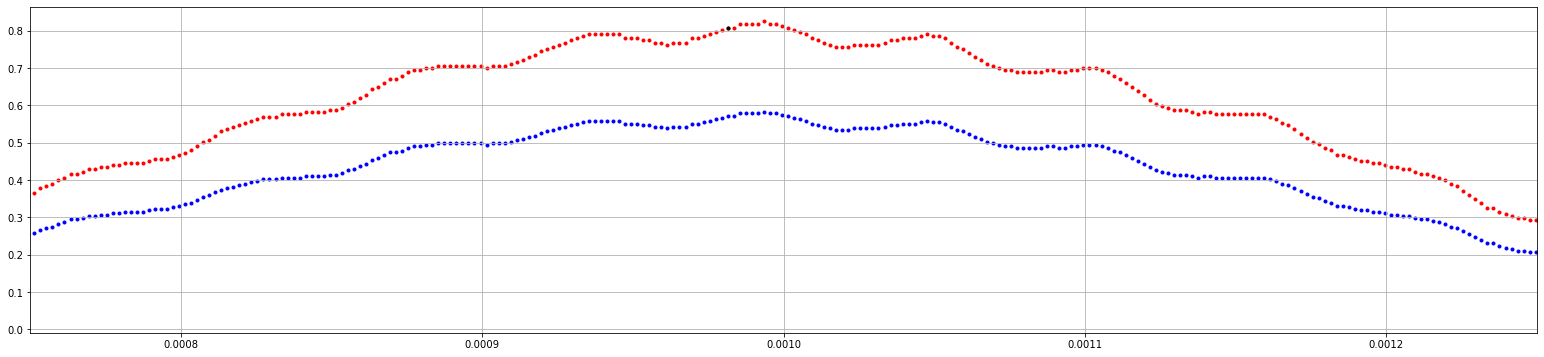

In [28]:
array = np.arange(0,2000,2)
Time = np.delete(time,array,1)
Signal = np.delete(signal,array,1)/signal[0][995]

for i in index:
    print(i)
    fig, ax = plt.subplots(figsize=(27,6))
    n = 490
    #ax.scatter(time[i], signal[i], color='green', marker='.')
    ax.scatter(Time[i], Signal[i]*signal[0][995], color='blue', marker='.')
    ax.scatter(Time[i], Signal[i], color='red', marker='.')
    ax.scatter(Time[i][n], Signal[i][n], color='black', marker='.')
    plt.xlim(0.00075,0.00125)
    ax.grid()
    plt.show()

In [ ]:
'''
[400:420]
[420:452]
[452:478]
[478:506]
[506:532]
[532:554]
[554:588]
[588:615]
'''

In [29]:
tTime = np.empty((11,8),dtype=object)
tSignal = np.empty((11,8),dtype=object)
print(tTime.shape)
for i in index:
    tTime[i] = np.array([Time[i][400:420],Time[i][420:452],Time[i][452:478],Time[i][478:506],Time[i][506:532],Time[i][532:554],Time[i][560:588],Time[i][588:615]])
    tSignal[i] = np.array([Signal[i][400:420],Signal[i][420:452],Signal[i][452:478],Signal[i][478:506],Signal[i][506:532],Signal[i][532:554],Signal[i][560:588],Signal[i][588:615]])

(11, 8)


<ipython-input-29-7c5dcb6c33f7>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tTime[i] = np.array([Time[i][400:420],Time[i][420:452],Time[i][452:478],Time[i][478:506],Time[i][506:532],Time[i][532:554],Time[i][560:588],Time[i][588:615]])
<ipython-input-29-7c5dcb6c33f7>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tSignal[i] = np.array([Signal[i][400:420],Signal[i][420:452],Signal[i][452:478],Signal[i][478:506],Signal[i][506:532],Signal[i][532:554],Signal[i][560:588],Signal[i][588:615]])


In [30]:
print(tSignal[10][3])
print(tSignal[10][3].max())

[0.76789343 0.76789343 0.7622323  0.76789343 0.76789343 0.76789343
 0.77921571 0.77921571 0.78487684 0.79053798 0.79619911 0.80186025
 0.80752138 0.80752138 0.81884366 0.81884366 0.81884366 0.81884366
 0.82450479 0.81884366 0.81884366 0.81318252 0.80752138 0.80186025
 0.79619911 0.79053798 0.77921571 0.77355457]
0.8245047921514014


In [31]:
a = np.array([])
b = np.array([])
c = np.array([])
d = np.array([])
e = np.array([])
f = np.array([])
g = np.array([])
h = np.array([])
ref = tSignal[0][3].max()
for i in index:
    a = np.append(a,tSignal[i][0].max()/ref)
    b = np.append(b,tSignal[i][1].max()/ref)
    c = np.append(c,tSignal[i][2].max()/ref)
    d = np.append(d,tSignal[i][3].max()/ref)
    e = np.append(e,tSignal[i][4].max()/ref)
    f = np.append(f,tSignal[i][5].max()/ref)
    g = np.append(g,tSignal[i][6].max()/ref)
    h = np.append(h,tSignal[i][7].max()/ref)

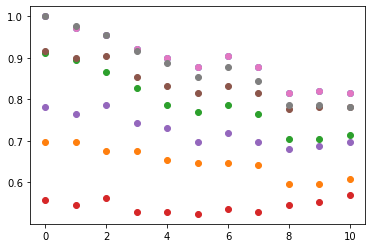

In [32]:
plt.scatter(index,d)
plt.scatter(index,g)
plt.scatter(index,f)
plt.scatter(index,a)
plt.scatter(index,b)
plt.scatter(index,c)
plt.scatter(index,d)
plt.scatter(index,e)

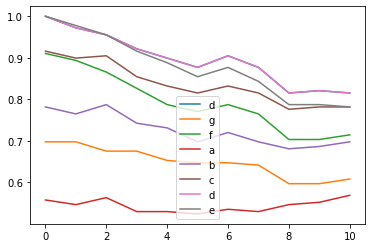

In [33]:
plt.plot(index,d,label='d')
plt.plot(index,g,label='g')
plt.plot(index,f,label='f')
plt.plot(index,a,label='a')
plt.plot(index,b,label='b')
plt.plot(index,c,label='c')
plt.plot(index,d,label='d')
plt.plot(index,e,label='e')
plt.legend()

In [85]:
def am(werte):
    return np.mean(werte)
def std(werte):
    summen_der_quadrate = 0
    for wert in werte:
        summen_der_quadrate+=(wert-am(werte))**2       
    return np.sqrt(summen_der_quadrate/(werte.size-1))

In [86]:
lambd = 632.8e-9
aw = (a[10]-d[10])*2.7
bw = (b[10]-d[10])*2.7
cw = (c[10]-d[10])*2.7
ew = (d[10]-e[10])*2.7
fw = (d[10]-f[10])*2.7
gw = (d[10]-g[10])*2.7
hw = (d[10]-h[10])*2.7

print(aw,bw,cw,ew,fw,gw,hw)
welle = np.array([np.sin(aw)/-3*lambd,np.sin(bw)/-2*lambd,np.sin(cw)/-1*lambd,np.sin(ew)/1*lambd,np.sin(fw)/2*lambd,np.sin(gw)/3*lambd,np.sin(hw)/4*lambd])
print(welle.mean())
print(std(welle))

-0.6650134626041881 -0.3173927889701806 -0.09068365399148033 0.09068365399148033 0.2720509619744404 0.5592158662807946 0.8766086552509753
9.457573822107822e-08
2.9391151685797645e-08


In [34]:
def bessel0(x, off, but):
    return jv(0, off*x)+but
def bessel1(x, off, but):
    return jv(1, off*x)+but
def bessel2(x, off, but):
    return jv(2, off*x)+but
def bessel3(x, off, but):
    return jv(3, off*x)+but
def bessel4(x, off, but):
    return jv(3, off*x)+but

In [44]:
popta, pcova = curve_fit(bessel3, index[5:], a[5:], maxfev=100000, p0=[0.26, 0.001])
poptb, pcovb = curve_fit(bessel2, index[5:], b[5:], maxfev=100000, p0=[0.6, 0.7])
poptc, pcovc = curve_fit(bessel1, index[2:], c[2:], maxfev=100000, p0=[0.25, 0.04])
poptd, pcovd = curve_fit(bessel0, index, d, maxfev=100000, p0=[0.25, 0.04])
popte, pcove = curve_fit(bessel1, index[6:], e[6:], maxfev=100000, p0=[0.25, 0.04])
poptf, pcovf = curve_fit(bessel2, index[6:], f[6:], maxfev=100000, p0=[0.6, 0.7])
poptg, pcovg = curve_fit(bessel3, index[6:], g[6:], maxfev=100000, p0=[0.6, 0.7])
#popth, pcovh = curve_fit(bessel4, index, f, maxfev=100000, p0=[0.25, 0.04])

In [87]:
print(popta, pcova, poptb, pcovb, poptc, pcovc, poptd, pcovd, popte, pcove, poptf, pcovf, poptg, pcovg)

[0.13823121 0.51833618] [[ 4.44433177e-05 -2.22158484e-05]
 [-2.22158484e-05  1.47567833e-05]] [0.39830993 0.27069507] [[0.00046638 0.00011403]
 [0.00011403 0.00080087]] [0.30886354 0.36045712] [[0.00066938 0.00045771]
 [0.00045771 0.00232186]] [ 0.08389568 -0.0439819 ] [[4.16173159e-05 5.76442584e-05]
 [5.76442584e-05 1.46863901e-04]] [0.25818338 0.26948432] [[0.00028315 0.00024466]
 [0.00024466 0.00064159]] [0.39873456 0.2937637 ] [[0.00059824 0.00031411]
 [0.00031411 0.00108901]] [0.52525413 0.23906394] [[0.00078551 0.00024069]
 [0.00024069 0.00115802]]


In [36]:
x = np.arange(0,10,0.1)

In [ ]:
poptb, pcovb = curve_fit(bessel2, index[6:], f[6:], maxfev=100000)
print(poptb)
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[6:], f[6:], yerr = np.full(5,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel2(x,poptf[0],poptf[1]),color = 'crimson',label = 'Bessel-fit')
plt.legend()

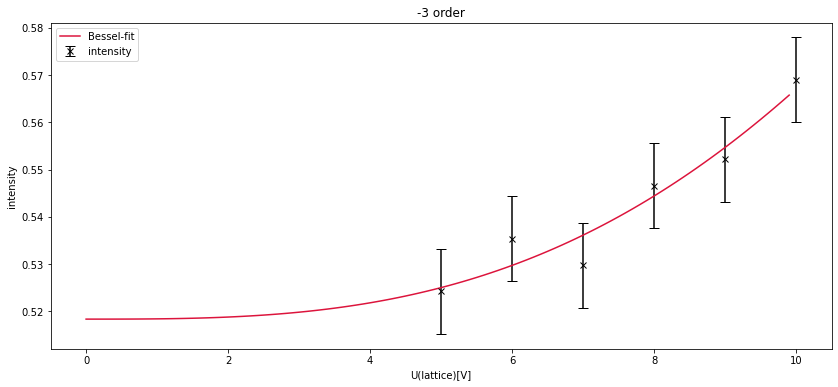

In [37]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[5:], a[5:], yerr = np.full(6,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel3(x,popta[0],popta[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'-3 order')
plt.legend()
plt.savefig("-3.pdf")

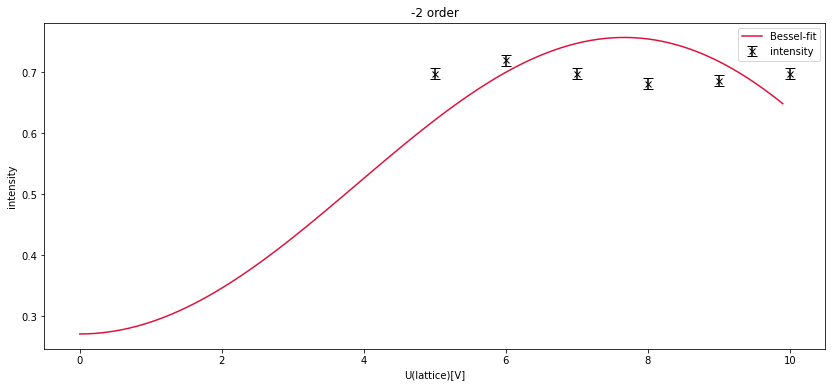

In [38]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[5:], b[5:], yerr = np.full(6,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel2(x,poptb[0],poptb[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'-2 order')
plt.legend()
plt.savefig("-2.pdf")

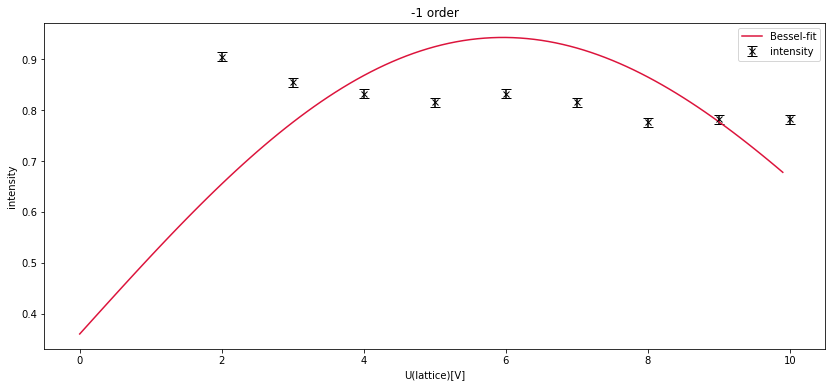

In [39]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[2:], c[2:], yerr = np.full(9,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel1(x,poptc[0],poptc[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'-1 order')
plt.legend()
plt.savefig("-1.pdf")

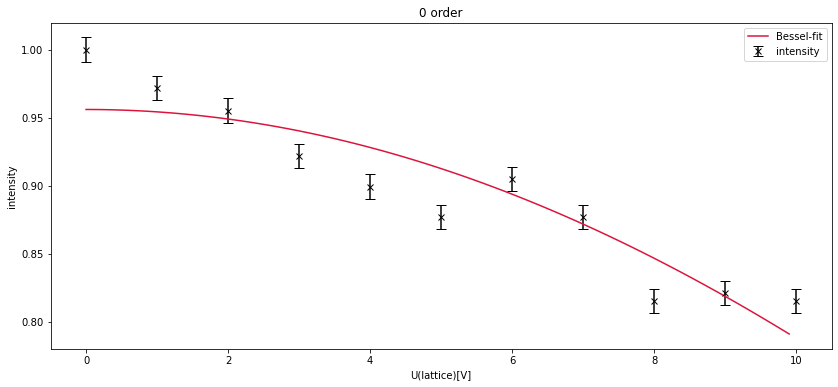

In [40]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index, d, yerr = np.full(11,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel0(x,poptd[0],poptd[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'0 order')
plt.legend()
plt.savefig("0.pdf")

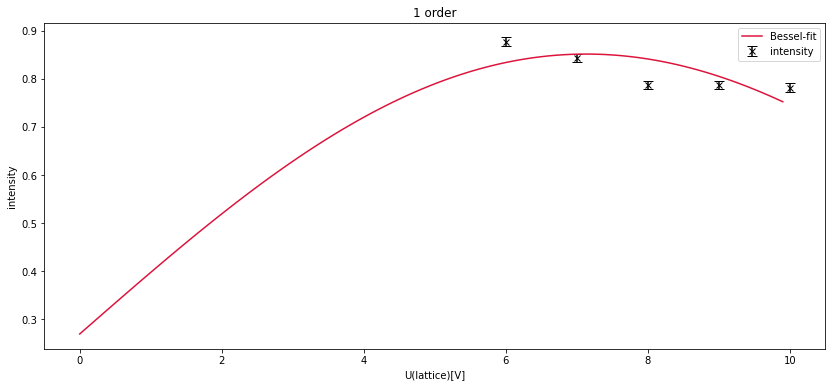

In [41]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[6:], e[6:], yerr = np.full(5,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel1(x,popte[0],popte[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'1 order')
plt.legend()
plt.savefig("1.pdf")

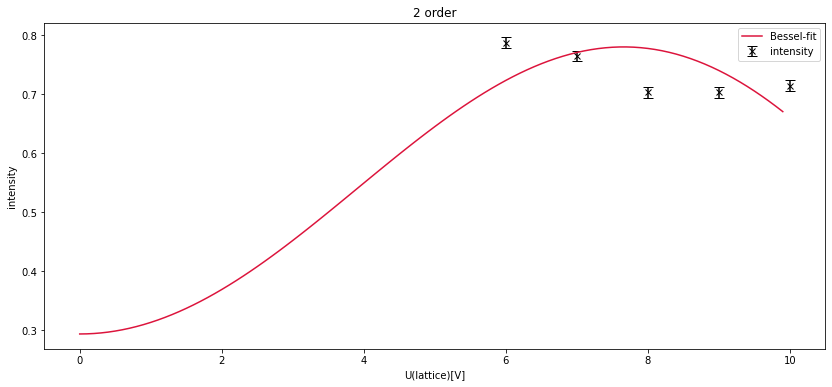

In [45]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[6:], f[6:], yerr = np.full(5,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel2(x,poptf[0],poptf[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'2 order')
plt.legend()
plt.savefig("2.pdf")

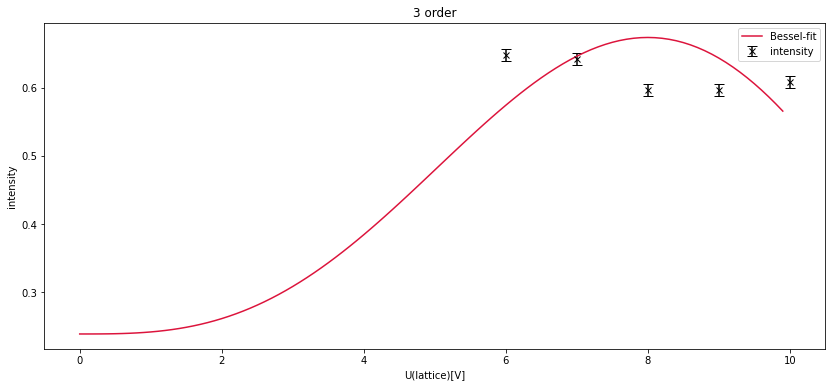

In [43]:
fig, ax = plt.subplots(figsize=(14,6))
plt.errorbar(index[6:], g[6:], yerr = np.full(5,0.009), fmt='x', color = 'black', capsize=5, ecolor='black', label = 'intensity')
plt.plot(x,bessel3(x,poptg[0],poptg[1]),color = 'crimson',label = 'Bessel-fit')
ax.set(xlabel=r'U(lattice)[V]', ylabel=r'intensity', title=r'3 order')
plt.legend()
plt.savefig("3.pdf")

In [ ]:
array = np.arange(0,2000,2)
ttime = np.delete(time,array,1)
tsignal = np.delete(signal,array,1)

In [ ]:
array = np.arange(0,2000,2)
tttime = np.delete(time,array,1)
ttsignal = np.delete(signal,array,1)

In [ ]:
ttime.shape

In [ ]:
for i in index:
    #popt, pcov = curve_fit(gauß, ttime[i], tsignal[i], maxfev=100000, p0=[1, 0.0004, 0.001,  0.05])
    #popt2, pcov2 = curve_fit(gauß, Time[i], Signal[i], maxfev=100000, p0=[1, 0.0004, 0.001,  0.05])
    x = np.linspace(min(ttime[i]), max(ttime[i]), 10000)
    #plt.plot(x, gauß(x, *popt), color='r')
    #plt.scatter(time[i], signal[i], color='blue', marker='.')
    #plt.scatter(tttime[i], ttsignal[i], color='green', marker='.')
    plt.scatter(ttime[i], tsignal[i], color='red', marker='.')
    
    #plt.xlim(0.0006,0.0014)
    plt.grid()
    plt.show()

In [ ]:
1073/2

In [ ]:
for i in index:
    print(tsignal[i][480:550].argmax())
    plt.scatter(ttime[i][480:650], tsignal[i][480:650], color='green', marker='.')
    plt.scatter(ttime[i][536], tsignal[i][536], color='red', marker='.')
    plt.ylim(-0.0075,0.015)
    #plt.xlim(0.0006,0.0014)
    plt.grid()
    plt.show()

In [ ]:
for i in index:
    print(ttsignal[i][480:550].argmax())
    plt.scatter(tttime[i][400:650], ttsignal[i][400:650], color='green', marker='.')
    plt.scatter(tttime[i][536], ttsignal[i][536], color='red', marker='.')
    #plt.ylim(-0.0075,0.015)
    #plt.xlim(0.0006,0.0014)
    plt.grid()
    plt.show()

In [72]:
tupils = []
for i in range(11):
    y = []
    for j in range(300,700):
        y.append((Time[i][j],Signal[i][j]))
    tupils.append(y)

In [ ]:
print(np.array(tupils).shape)

range(1, 12)


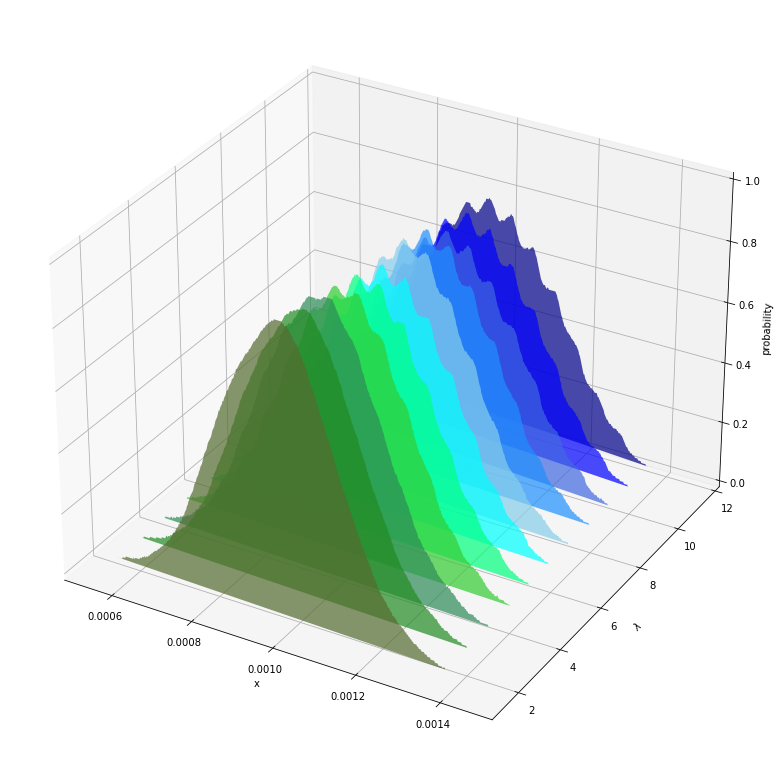

<Figure size 432x288 with 0 Axes>

In [75]:
np.random.seed(19680801)


def polygon_under_graph(x, y):
    """
    Construct the vertex list which defines the polygon filling the space under
    the (x, y) line graph. This assumes x is in ascending order.
    """
    return [(x[0], 0.), *zip(x, y), (x[-1], 0.)]


ax = plt.figure(figsize=(14,14)).add_subplot(projection='3d')

x = np.linspace(0., 10., 31)
#print(x)
lambdas = range(1, 12)
print(lambdas)

# verts[i] is a list of (x, y) pairs defining polygon i.
verts = [polygon_under_graph(x, poisson.pmf(l, x)) for l in lambdas]
#print(verts)
facecolors = np.array(['darkolivegreen','forestgreen','seagreen','limegreen','springgreen','cyan','skyblue','dodgerblue','royalblue','blue','darkblue'])

poly = PolyCollection(tupils,facecolors=facecolors, alpha=.7)
ax.add_collection3d(poly, zs=lambdas, zdir='y')

ax.set(xlim=(0.0005, 0.0015), ylim=(1, 12), zlim=(0, 1),
       xlabel='x', ylabel=r'$\lambda$', zlabel='probability')

plt.show()
plt.savefig('3d.pdf')

In [ ]:
facecolors = plt.colormaps()[2]
facecolors